<a href="https://colab.research.google.com/github/Yuns-u/Codestates_Project/blob/main/AI_05_%EC%9D%B4%EC%9C%A4%EC%88%98_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목표
다음 분기에 어떤 게임을 설계해야 할 것인지

# 방법
기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 논리적으로 해보자. 

# 들어가야하는 분석
1. 지역에 따라서 선호하는 게임 장르가 다른가?
2. 연도별 게임의 트렌드가 있는가?
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

## 기존 데이터 탐색하기
- Name : 게임 타이틀
- Platform : 게임이 지원되는 플랫폼 이름
- Year : 게임 출시된 연도
- Genre : 게임의 장르
- Publisher : 게임을 제작한 회사
- NA_Sales : 북미지역에서의 출고량
- EU_Sales : 유럽지역에서의 출고량
- JP_Sales : 일본지역에서의 출고량
- Other_Sales : 기타지역에서의 출고량


In [ ]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
raw_df 

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
raw_df.isna().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

## raw_df 수정할 항목
1. column = ['unnamed: 0'] 없애기
2. 결측치 확인하니 Year, Genre, Publisher에 빠진 항목들이 있다. 이것을 어떻게 처리할 것인지 생각하고 처리하거나 대체하기
3. 연도를 float에서 int로 바꿔주기
4. sales들의 수치 확인하고 대체하거나 바꿔주기



In [ ]:
raw_df = raw_df.drop([raw_df.columns[0]],axis=1)
raw_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


결측치 확인하니 Year, Genre, Publisher에 빠진 항목들이 있다. 이것을 어떻게 처리할 것인지 생각하고 처리하거나 대체하기 : 연도나 장르, 퍼블리셔가 빠진 이유는 무엇일까? 나는 이것을 임의로 채울 수 없다. publisher는 몰라도 연도나 장르가 빠진 것은 분석에서 중요한 지표로 작용할 수 있기 때문이다. 하지만 그 부분에 결측치가 있는 데이터의 판매량이 유의미하다면? 분석에서 제외하기보다 0으로 넣어서 계산하는 것이 좀 더 바람직하지 않을까? 하지만 이것은 어차피 예측이다. 예측은 정확한 값을 도출하기보다 몇 퍼센트의 확률로 이럴 것이다하고 예측하는 것이므로, 결측치를 아예 없애주는 게 계산에 더 도움이 될 것 같다. 결측치는 많아야 400개가 되지 않고 내가 가진데이터는 16600개가 조금 안되니까 

In [ ]:
raw_df = raw_df.dropna()
raw_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
#이름이 중복된 것은 없을까?
TF = raw_df.duplicated()
true_count = sum(TF)
true_count 

0

# 다음 분기는 2017년일 것이다.

In [ ]:
raw_df['Year'] = raw_df['Year'].apply(int)
#이 데이터에서 연도도 0부터 98까지의 숫자들이 있다.
raw_df.sort_values(by=['Year']).head(90)
#head()안에 숫자 104를 넣어보면 0~98까지의 두자리수가 있다.
#확인해보니 16에서 뛰는 것을 보면 다음 분기는 17년인 것 같다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9276,Trade & Battle: Card Hero,GB,0,Strategy,Nintendo,0,0,0.2,0
16394,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0
14666,Strider 2,PS,0,Platform,Virgin Interactive,0.05,0.03,0,0.01
2249,SplashDown,PS2,1,Racing,Atari,0.34,0.27,0,0.09
8681,NCAA Football 2002,PS2,1,Sports,Electronic Arts,0.77,0.6,0,0.2
...,...,...,...,...,...,...,...,...,...
4010,Uncharted 4: A Thief's End,PS4,16,Shooter,Sony Computer Entertainment,1.3M,2.07,0.18,0.65
4365,Adventure Island,NES,86,Platform,Hudson Soft,0,0,1.05,0
15985,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,0.02,0
4807,Virtua Cop,SAT,95,Shooter,Sega,0,0,0.62,0


In [ ]:
#2020년에 한 개, 2017년에 3개의 게임이 있지만 이것을 가지고 2021년의 분석을 하기에는 신빙성이 적다.
#차라리 2016년까지의 자료들로 2017년을 예측하는 것이 더 유의미할 것이다.
raw_df.sort_values(by=['Year'],ascending=False).head(90)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6906,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0K,0,0.02
5310,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0
10240,LEGO Marvel's Avengers,XOne,2016,Action,Warner Bros. Interactive Entertainment,0.18,0.11,0,0.03
...,...,...,...,...,...,...,...,...,...
15907,Doom (2016),PC,2016,Shooter,Bethesda Softworks,0.06,0.1,0,0.01
5523,NASCAR Heat Evolution,XOne,2016,Racing,Dusenberry Martin Racing,0.02,0,0,0
11203,Utawarerumono: Futari no Hakuoro,PS3,2016,Misc,Aqua Plus,0,0,0.01,0
2582,Sumikko Gurashi: Mura o Tsukurundesu,3DS,2016,Misc,Nippon Columbia,0,0,0.06,0


In [ ]:
#연도를 정수로 바꿔주기

NewYear = []

def newYear(col):
  for x in col:
    if x <20:
      x += 2000
      NewYear.append(x)
    elif x <100:
      x += 1900
      NewYear.append(x)
    else:
      NewYear.append(x)
  return NewYear

raw_df['Year'] = newYear(raw_df['Year'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


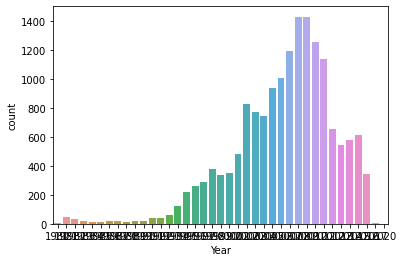

In [ ]:
#연도별 게임의 수를 확인해보자
raw_years = raw_df['Year'].copy()
import seaborn as sns

sns.countplot(raw_years)

## 21세기(2000~2016)의 자료들만가지고 분석하자.
이 데이터는 지나치게 1980년부터 2020년까지 출시된 게임들의 장르, 플랫폼, 제작사 등으로 분류한 데이터이다. 

In [ ]:
#21세기 이후의 게임들을 분석해보는 건 어떨까?

millenial_df = raw_df[~(raw_df['Year'] < 2000)]  
new_df = millenial_df[~(millenial_df['Year'] > 2016)] 
new_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16592,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0,0,0.02,0
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13


In [ ]:
#연도별 게임 개수
new_df.groupby('Year').size()

Year
2000     348
2001     480
2002     826
2003     774
2004     740
2005     934
2006    1005
2007    1195
2008    1423
2009    1428
2010    1253
2011    1133
2012     652
2013     545
2014     580
2015     611
2016     342
dtype: int64

# Sales들의 수치 K로 통일시켜주기

In [ ]:
#sales들의 수치 확인
#K = 1000 = 10**3
#M = 1000000 = 10**6

#raw_df['NA_Sales'].str.replace('K','').astype(float)*1000
#raw_df['NA_Sales'].str.replace('M','').astype(float)*1000000

#단위를 무엇으로 통일시켜야하는 것인지.
#K가 붙은 것, 단위가 없는 것, M이 붙은 것.
#게임업계는 밀리언셀러가 나온 건 독보적인 것이다. GTA처럼 잘나간 건 M이 붙고 나머지는 K일 것 같음
#K는 떼어주고 M은 1000을 곱해주자.

#isdigit은 소수점이 있는 실수는 사용할 수 없으므로..전체에 1000을 일단 곱해주고 점을 지우는 게 필요할 듯.

In [ ]:
new_df['NA_Sales'] = new_df.NA_Sales.replace(r'[KM]', '', regex=True).astype(float) * new_df.NA_Sales.str.extract(r'[\d\.]+([KM])', expand=False).fillna(1).replace(['K','M'], [1, 10**3]).astype(int)
new_df['EU_Sales'] = new_df.EU_Sales.replace(r'[KM]', '', regex=True).astype(float) * new_df.EU_Sales.str.extract(r'[\d\.]+([KM])', expand=False).fillna(1).replace(['K','M'], [1, 10**3]).astype(int)
new_df['JP_Sales'] = new_df.JP_Sales.replace(r'[KM]', '', regex=True).astype(float) * new_df.JP_Sales.str.extract(r'[\d\.]+([KM])', expand=False).fillna(1).replace(['K','M'], [1, 10**3]).astype(int)
new_df['Other_Sales'] = new_df.Other_Sales.replace(r'[KM]', '', regex=True).astype(float) * new_df.Other_Sales.str.extract(r'[\d\.]+([KM])', expand=False).fillna(1).replace(['K','M'], [1, 10**3]).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
new_df.sort_values(by=['EU_Sales'],ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7865,FIFA 14,X360,2013,Sports,Electronic Arts,0.92,2930.0,0.01,0.46
1629,Assassin's Creed III,PS3,2012,Action,Ubisoft,2.64,2560.0,0.16,1.14
10155,Crash Bandicoot: The Wrath of Cortex,PS2,2001,Platform,Universal Interactive,2.07,2290.0,0.24,0.82
8010,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2130.0,0.06,0.69
15314,Call of Duty: Advanced Warfare,XOne,2014,Shooter,Activision,3.21,1530.0,0.01,0.38
5024,WWF SmackDown!,PS,2000,Fighting,THQ,2.01,1350.0,0.06,0.16
4898,Final Fantasy XIII,PS3,2009,Role-Playing,Square Enix,1.74,1240.0,1.87,0.52
14318,Viva Pinata,X360,2006,Simulation,Microsoft Game Studios,0.45,960.0,0.02,0.20
3131,Call of Duty: Modern Warfare 2,PC,2009,Shooter,Activision,0.01,790.0,0.00,0.09
972,Smarty Pants,Wii,2007,Misc,Electronic Arts,0.53,760.0,0.00,0.16


In [ ]:
#위쳐의 경우 아시아 배포사가 반다이 남코인데 번역과정에서 잘못 들어간 것 같다...
#이 자료가 정확하다고 100% 신뢰할 수 없을 것 같다.

# EDA 및 전처리가 끝난 데이터

In [ ]:
new_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16592,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13


In [ ]:
new_df.info()

#왜 매출들이 object형인가?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14269 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         14269 non-null  object 
 1   Platform     14269 non-null  object 
 2   Year         14269 non-null  int64  
 3   Genre        14269 non-null  object 
 4   Publisher    14269 non-null  object 
 5   NA_Sales     14269 non-null  float64
 6   EU_Sales     14269 non-null  float64
 7   JP_Sales     14269 non-null  float64
 8   Other_Sales  14269 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

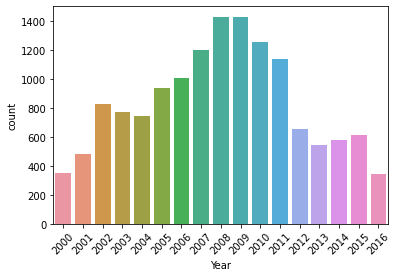

In [ ]:
sns.countplot(new_df['Year'])
plt.xticks(rotation=45)

# 이제 분석을 시작해보자
--------

**필수 분석**
1. 지역에 따라서 선호하는 게임 장르가 다른가?
2. 연도별 게임의 트렌드가 있는가?
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

## ⭐️ new_df에 총매출칼럼 만들어주고 분석.

(1) 판매량수만 한 번 봐보자.

In [ ]:
new_df['Total_Sales(K)'] = new_df['NA_Sales']+new_df['EU_Sales']+new_df['JP_Sales']+new_df['Other_Sales']

Total_Sales = {'Name':new_df['Name'],'Total_Sales(K)':new_df['Total_Sales(K)']}
TS_df = pd.DataFrame(data=Total_Sales)
TS_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Total_Sales(K)
0,Candace Kane's Candy Factory,0.04
1,The Munchables,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,0.02
3,Deal or No Deal: Special Edition,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,0.25
...,...,...
16592,Minna no Chizu 2,0.02
16593,Ice Age 2: The Meltdown,0.20
16594,Rainbow Islands: Revolution,0.01
16595,NBA 2K16,0.79


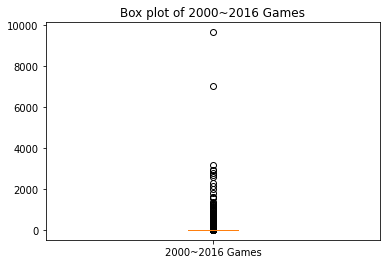

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline

plt.boxplot(TS_df['Total_Sales(K)'])
plt.title('Box plot of 2000~2016 Games')
plt.xticks([1], ['2000~2016 Games'])

plt.show()

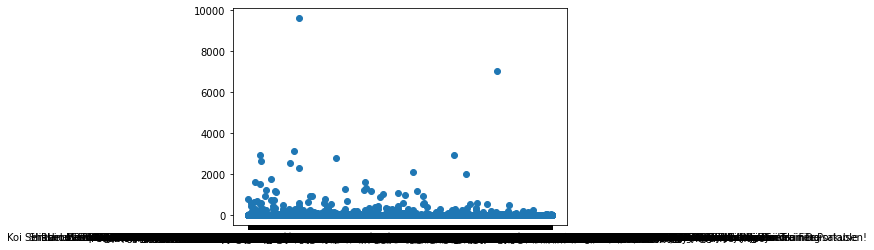

In [ ]:
plt.scatter(x=TS_df['Name'], y=TS_df['Total_Sales(K)'])

게임은 킬러 콘텐츠 몇 개(위의 그래프 상으로 보이는, 이상치처럼 보이는 20여개의 게임 빼는 것이 좋다.박스 플롯을 그려보면 국가별로 판매량의 사분위, 이상치 등을 알 수 있을 것이다.

In [ ]:
TS_df.sort_values(by=['Total_Sales(K)'],ascending=False).head(26)

,Name,Total_Sales(K)
10913,Grand Theft Auto V,9636.75
12600,Halo: Reach,7032.84
1810,Pokemon FireRed/Pokemon LeafGreen,3157.34
9829,Super Mario Bros. 3,2932.28
7865,FIFA 14,2931.39
3589,Final Fantasy IX,2782.53
7499,Tony Hawk's Pro Skater 3,2661.76
1629,Assassin's Creed III,2563.94
10155,Crash Bandicoot: The Wrath of Cortex,2293.13
8010,Battlefield 3,2135.21


# 1M 이상 팔린 킬러콘텐츠, AAA급 게임 분석

여기에서이 킬러콘텐츠란 1백만장 이상 팔린 타이틀, AAA급 게임이라고 불리는 타이틀이라고 설정했다. AAA급 게임은 쉽게 말하면 대규모 자본과 개발기간이 투자된 블록버스터 영화같은 게임을 의미한다. 개발기간이 내가 알기로 2년 이상이 소모되는 경우가 많으니 당장 1년 안에 개발 및 출시를 해야하는 게임이라면 이러한 게임들은 레퍼런스로 삼고 필요한 리소스나 시스템을 벤치마킹하는 방식으로 활용하는 것이 좋을 것이다.

In [ ]:
AAA_Sales = {'Name':new_df['Name'],'Genre':new_df['Genre'],'Total_Sales(K)':new_df['Total_Sales(K)']}
AAA_df = pd.DataFrame(data=AAA_Sales)
AAA_df = AAA_df.sort_values(by=['Total_Sales(K)'],ascending=False).head(26)
AAA_df

,Name,Genre,Total_Sales(K)
10913,Grand Theft Auto V,Action,9636.75
12600,Halo: Reach,Shooter,7032.84
1810,Pokemon FireRed/Pokemon LeafGreen,Role-Playing,3157.34
9829,Super Mario Bros. 3,Platform,2932.28
7865,FIFA 14,Sports,2931.39
3589,Final Fantasy IX,Role-Playing,2782.53
7499,Tony Hawk's Pro Skater 3,Sports,2661.76
1629,Assassin's Creed III,Action,2563.94
10155,Crash Bandicoot: The Wrath of Cortex,Platform,2293.13
8010,Battlefield 3,Shooter,2135.21


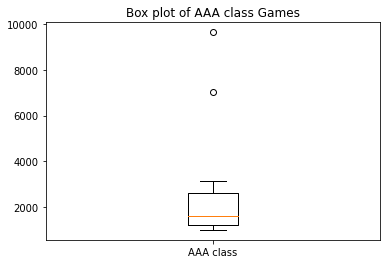

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline

plt.boxplot(AAA_df['Total_Sales(K)'])
plt.title('Box plot of AAA class Games')
plt.xticks([1], ['AAA class'])

plt.show()

위의 박스그래프에서 알 수 있듯이, GTA 5와 Halo: Reach의 경우는 매우 특수한, 걸작 중의 걸작임을 알 수 있다. AAA급 게임은 일반적으로 장기간의 개발기간과 막대한 자본이 들어가기 때문에 1년 안에 개발 및 출시를 완료해야한다면 현실적으로 AAA급 게임을 개발하기 어렵다. AAA급 게임은 평균적으로 1500K 정도의 매출을 가지고 있는 것으로 보이나 애초에 이 그룹은 1000K 이상이기 때문에 큰 의미는 없다. 다만 GTA5나 Halo:reach처럼 AAA급 중에서도 압도적으로 매출이 많은 게임은극히 드문 경우이므로 1년의 기간 안에 개발하기에는 어려우므로 제거. 또한 AAA급이라도 해도 각 지역의 매출을 보면 차이가 눈으로봐도 매우 크기 때문에 지역별로 선호하는 장르가 다르다는 것을 확인할 수 있다.

## AAA급 게임은 장르별 차이가 있을까?
평균적으로 Action, Shooter, Role-Playing 순으로 장르별 매출이 높았다. 기본적으로 게임이 위의 순서대로 많이 출시되는데, AAA급 게임은 각각의 개수가 10개 미만으로 평균을 분석하기보다 만들고자 하는 게임의 레퍼런스로 삼는 것이 바람직할 것이다.



In [ ]:
AAA_df.groupby('Genre').size()

Genre
Action          4
Fighting        1
Misc            1
Platform        3
Racing          1
Role-Playing    3
Shooter         5
Simulation      1
Sports          6
Strategy        1
dtype: int64

In [ ]:
AAA_df.groupby(['Genre'])
AAA_Genre_TS = AAA_df.groupby(['Genre'])['Total_Sales(K)'].sum().reset_index()
AAA_Genre_TS['number_of_AAA'] = [4,1,1,3,1,3,5,1,6,1]
AAA_Genre_TS['mean_sale_of_AAA'] = AAA_Genre_TS['Total_Sales(K)']/AAA_Genre_TS['number_of_AAA']

AAA_Genre_TS.sort_values(by=['mean_sale_of_AAA'],ascending=False)

,Genre,Total_Sales(K),number_of_AAA,mean_sale_of_AAA
0,Action,14641.91,4,3660.477500
6,Shooter,13786.40,5,2757.280000
5,Role-Playing,7184.00,3,2394.666667
3,Platform,6407.41,3,2135.803333
2,Misc,2010.19,1,2010.190000
8,Sports,10506.50,6,1751.083333
7,Simulation,1611.99,1,1611.990000
1,Fighting,1352.23,1,1352.230000
4,Racing,1210.96,1,1210.960000
9,Strategy,1010.65,1,1010.650000


## 장르별로 상위 30개의 게임들을 분석하여 전체의 AAA급과 각 장르별 AAA급을 살펴보고 전체의 AAA급을 제외할지 정하기

분석의 수가 너무 적다. CLT에 의해 각 장르별로 30개 정도가 되면 유의미할 것이다. 그렇다면 장르별로 AAA급 게임을 설정하는 것이 바람직할 것같다. 12개의 장르에서 30개씩 뽑는 것이 나중에 장르를 결정한 뒤 제작할 게임에게도 좋을 것 같다. 

In [ ]:
AAA_Sales = {'Name':new_df['Name'],'Genre':new_df['Genre'],'Total_Sales(K)':new_df['Total_Sales(K)']}
All_Genre_df = pd.DataFrame(data=AAA_Sales)
All_Genre_df

,Name,Genre,Total_Sales(K)
0,Candace Kane's Candy Factory,Action,0.04
1,The Munchables,Action,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,Adventure,0.02
3,Deal or No Deal: Special Edition,Misc,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,Platform,0.25
...,...,...,...
16592,Minna no Chizu 2,Misc,0.02
16593,Ice Age 2: The Meltdown,Platform,0.20
16594,Rainbow Islands: Revolution,Action,0.01
16595,NBA 2K16,Sports,0.79


In [ ]:
Genre_All = All_Genre_df.groupby(['Genre'])

#각 장르별로 Total_Sales에 따라 상위 30개씩 뽑기
func = lambda g: g.sort_values(by='Total_Sales(K)', ascending = False)[:30]
Genre_All_grouped = Genre_All.apply(func)
Genre_All_grouped 
#12개의 장르에 대해 전체 매출이 상위 30개인 것들끼리 잘 뽑혔다.

Name  ... Total_Sales(K)
Genre                                                       ...               
Action   10913                          Grand Theft Auto V  ...        9636.75
         1629                         Assassin's Creed III  ...        2563.94
         672    Star Wars The Clone Wars: Lightsaber Duels  ...        1230.44
         4471      Harry Potter and the Chamber of Secrets  ...        1210.78
         14839     LEGO Star Wars II: The Original Trilogy  ...         960.12
...                                                    ...  ...            ...
Strategy 12881                                       Spore  ...           1.18
         4135                           Plants vs. Zombies  ...           1.18
         14166                                    Pikmin 3  ...           1.11
         2925                            Empire: Total War  ...           1.09
         7121                                Zoo Tycoon DS  ...           0.99

[360 rows x 3 columns]

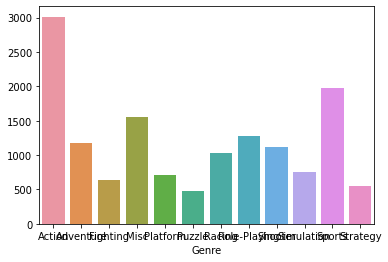

In [ ]:
#각 장르별분포
result = Genre_All.size()
sns.barplot(x = result.index, y = result.values)

In [ ]:
Genre_All_grouped.plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x7f38b7e87b90>>

In [ ]:
#하다하다 안되었기 때문에, 각 장르별로 그룹을 만들어주자.

Action_group = All_Genre_df.groupby(['Genre']).get_group('Action')
Action_AAA = Action_group.sort_values(by='Total_Sales(K)', ascending = False)[:30]
Action_AAA = Action_AAA.drop(columns=['Genre','Name'])
Action_AAA = Action_AAA.T

Adventure_group = All_Genre_df.groupby(['Genre']).get_group('Adventure')
Adventure_AAA = Adventure_group.sort_values(by='Total_Sales(K)', ascending = False)[:30]
Adventure_AAA = Adventure_AAA.drop(columns=['Genre','Name'])
Adventure_AAA = Adventure_AAA.T

Fighting_group = All_Genre_df.groupby(['Genre']).get_group('Fighting')
Fighting_AAA = Fighting_group.sort_values(by='Total_Sales(K)', ascending = False)[:30]
Fighting_AAA = Fighting_AAA.drop(columns=['Genre','Name'])
Fighting_AAA = Fighting_AAA.T

Misc_group = All_Genre_df.groupby(['Genre']).get_group('Misc')
Misc_AAA = Misc_group.sort_values(by='Total_Sales(K)', ascending = False)[:30]
Misc_AAA = Misc_AAA.drop(columns=['Genre','Name'])
Misc_AAA = Misc_AAA.T

Platform_group = All_Genre_df.groupby(['Genre']).get_group('Platform')
Platform_AAA = Platform_group.sort_values(by='Total_Sales(K)', ascending = False)[:30]
Platform_AAA = Platform_AAA.drop(columns=['Genre','Name'])
Platform_AAA = Platform_AAA.T

Puzzle_group = All_Genre_df.groupby(['Genre']).get_group('Puzzle')
Puzzle_AAA = Puzzle_group.sort_values(by='Total_Sales(K)', ascending = False)[:30]
Puzzle_AAA = Puzzle_AAA.drop(columns=['Genre','Name'])
Puzzle_AAA = Puzzle_AAA.T

Racing_group = All_Genre_df.groupby(['Genre']).get_group('Racing')
Racing_AAA = Racing_group.sort_values(by='Total_Sales(K)', ascending = False)[:30]
Racing_AAA = Racing_AAA.drop(columns=['Genre','Name'])
Racing_AAA = Racing_AAA.T

RolePlaying_group = All_Genre_df.groupby(['Genre']).get_group('Role-Playing')
RolePlaying_AAA = RolePlaying_group.sort_values(by='Total_Sales(K)', ascending = False)[:30]
RolePlaying_AAA = RolePlaying_AAA.drop(columns=['Genre','Name'])
RolePlaying_AAA = RolePlaying_AAA.T

Shooter_group = All_Genre_df.groupby(['Genre']).get_group('Shooter')
Shooter_AAA = Shooter_group.sort_values(by='Total_Sales(K)', ascending = False)[:30]
Shooter_AAA = Shooter_AAA.drop(columns=['Genre','Name'])
Shooter_AAA = Shooter_AAA.T

Simulation_group = All_Genre_df.groupby(['Genre']).get_group('Simulation')
Simulation_AAA = Simulation_group.sort_values(by='Total_Sales(K)', ascending = False)[:30]
Simulation_AAA = Simulation_AAA.drop(columns=['Genre','Name'])
Simulation_AAA = Simulation_AAA.T

Sports_group = All_Genre_df.groupby(['Genre']).get_group('Sports')
Sports_AAA = Sports_group.sort_values(by='Total_Sales(K)', ascending = False)[:30]
Sports_AAA = Sports_AAA.drop(columns=['Genre','Name'])
Sports_AAA = Sports_AAA.T

Strategy_group = All_Genre_df.groupby(['Genre']).get_group('Strategy')
Strategy_AAA = Strategy_group.sort_values(by='Total_Sales(K)', ascending = False)[:30]
Strategy_AAA = Strategy_AAA.drop(columns=['Genre','Name'])
Strategy_AAA = Strategy_AAA.T

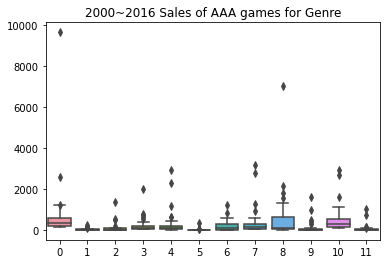

In [ ]:
AAA_data = [Action_AAA, Adventure_AAA, Fighting_AAA,Misc_AAA,Platform_AAA,Puzzle_AAA,Racing_AAA,RolePlaying_AAA,Shooter_AAA,Simulation_AAA, Sports_AAA,Strategy_AAA]
Genre = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','RolePlaying','Shooter','Simulation','Sports','Strategy']

sns.boxplot(data=AAA_data)


plt.rcParams['figure.figsize'] = (15,11)

#plt.xticks(rotation=60, fontsize=13)
plt.title('2000~2016 Sales of AAA games for Genre')
plt.show()

각 장르별 매출 상위 30개의 데이터에서도 이상치의 영향이 매우 크다. 따라서 각 지역 및 연도별 분석을 할 때 전체의 AAA급 게임(1M 이상이 판매된 게임)의 영향이 매우 크니 이를 제거할 필요가 있다. 

# 지역에 따라서 선호하는 게임 장르가 다른가?

북미, 유럽, 일본에 따라서 선호하는 게임 장르가 다른지 확인하면 될 것이다.

결과

미국: Action, Shooter, Sports 순
유럽: Action, Shooter, Platform 순
일본: Role-Playing이 압도적 1위.

In [ ]:
# 이 데이터에서 게임 장르는 어떻게 될까?
new_df.groupby('Genre').size()

Genre
Action          3012
Adventure       1169
Fighting         638
Misc            1558
Platform         715
Puzzle           476
Racing          1030
Role-Playing    1283
Shooter         1113
Simulation       756
Sports          1973
Strategy         546
dtype: int64

## 북미 장르별 매출

In [ ]:
#북미에서 장르별 매출은 얼마나 될까?
NA_data = {'Name':new_df['Name'].copy(),'Platform':new_df['Platform'].copy(),'Year':new_df['Year'].copy(),'Genre':new_df['Genre'].copy() ,'NA_Sales':new_df['NA_Sales'].copy()}

NA_df = pd.DataFrame(data=NA_data)
NA_df.groupby(['Genre'])

NA_Genre_TS = NA_df.groupby(['Genre'])['NA_Sales'].sum().reset_index()
NA_Genre_TS

,Genre,NA_Sales
0,Action,18020.62
1,Adventure,781.71
2,Fighting,1179.60
3,Misc,4426.42
4,Platform,4694.05
5,Puzzle,84.58
6,Racing,4037.06
7,Role-Playing,1580.33
8,Shooter,12113.24
9,Simulation,3109.98


## 유럽 장르별 매출

In [ ]:
#유럽에서 장르별 매출은 얼마나 될까?
EU_data = {'Name':new_df['Name'].copy(),'Platform':new_df['Platform'].copy(),'Year':new_df['Year'].copy(),'Genre':new_df['Genre'].copy() ,'EU_Sales':new_df['EU_Sales'].copy()}

EU_df = pd.DataFrame(data=EU_data)
EU_df.groupby(['Genre'])

EU_Genre_TS = EU_df.groupby(['Genre'])['EU_Sales'].sum().reset_index()
EU_Genre_TS

,Genre,EU_Sales
0,Action,7022.71
1,Adventure,239.77
2,Fighting,1493.99
3,Misc,2961.50
4,Platform,4836.54
5,Puzzle,450.03
6,Racing,2081.15
7,Role-Playing,1739.37
8,Shooter,6363.65
9,Simulation,1163.28


## 일본 장르별 매출

In [ ]:
#일본에서 장르별 매출은 얼마나 될까?
JP_data = {'Name':new_df['Name'].copy(),'Platform':new_df['Platform'].copy(),'Year':new_df['Year'].copy(),'Genre':new_df['Genre'].copy() ,'JP_Sales':new_df['JP_Sales'].copy()}

JP_df = pd.DataFrame(data=JP_data)
JP_df.groupby(['Genre'])

JP_Genre_TS = JP_df.groupby(['Genre'])['JP_Sales'].sum().reset_index()
JP_Genre_TS

,Genre,JP_Sales
0,Action,1097.71
1,Adventure,116.89
2,Fighting,454.34
3,Misc,312.36
4,Platform,634.51
5,Puzzle,23.74
6,Racing,47.70
7,Role-Playing,8173.95
8,Shooter,82.72
9,Simulation,100.00


## 지역별 장르별 매출 시각화 그래프

Text(0.5, 1.0, '2000~2016 North America Sales for Genre')

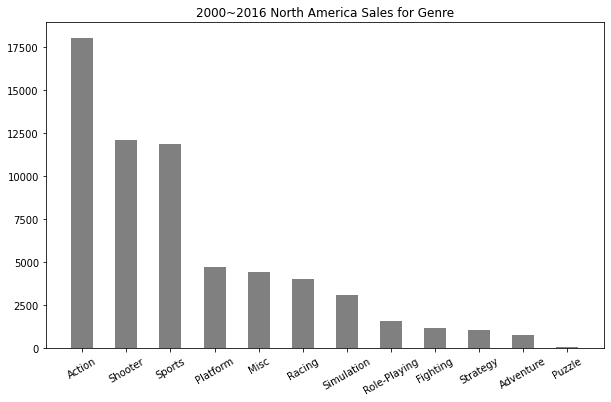

In [ ]:
#북미 장르별 매출 막대그래프

plt.rcParams['figure.figsize'] = (10,6)

NA_Genre_TS = NA_Genre_TS.sort_values(by=['NA_Sales'],ascending=False)
ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels(NA_Genre_TS['Genre'], rotation=30)
plt.bar(NA_Genre_TS['Genre'],NA_Genre_TS['NA_Sales'],color='gray',width=0.5)
plt.title('2000~2016 North America Sales for Genre')

Text(0.5, 1.0, '2000~2016 EU Sales for Genre')

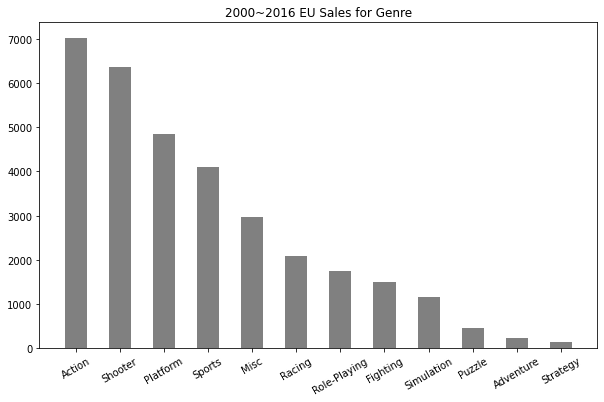

In [ ]:
#EU 장르별 매출 막대그래프

EU_Genre_TS = EU_Genre_TS.sort_values(by=['EU_Sales'],ascending=False)
ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels(EU_Genre_TS['Genre'], rotation=30)
plt.bar(EU_Genre_TS['Genre'],EU_Genre_TS['EU_Sales'],color='gray',width=0.5)
plt.title('2000~2016 EU Sales for Genre')

Text(0.5, 1.0, '2000~2016 Japan Sales for Genre')

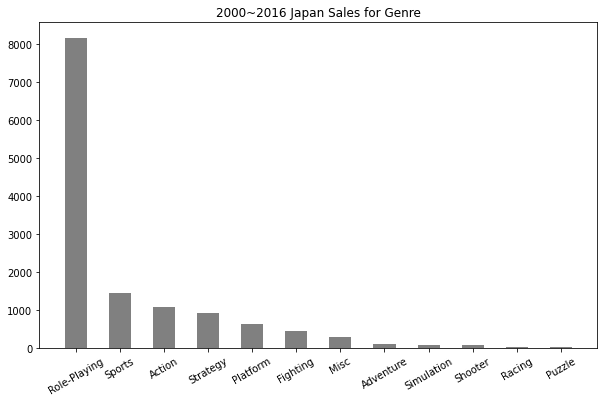

In [ ]:
#일본 장르별 매출 막대그래프

JP_Genre_TS = JP_Genre_TS.sort_values(by=['JP_Sales'],ascending=False)
ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels(JP_Genre_TS['Genre'], rotation=30)
plt.bar(JP_Genre_TS['Genre'],JP_Genre_TS['JP_Sales'],color='gray',width=0.5)
plt.title('2000~2016 Japan Sales for Genre')

In [ ]:
JP_Genre_TS.sort_values(by=['JP_Sales'],ascending=False)

,Genre,JP_Sales
7,Role-Playing,8173.95
10,Sports,1464.32
0,Action,1097.71
11,Strategy,936.60
4,Platform,634.51
2,Fighting,454.34
3,Misc,312.36
1,Adventure,116.89
9,Simulation,100.00
8,Shooter,82.72


# 전체의 AAA급 게임을 제외했을 때 지역에 따라 선호하는 게임의 장르가 다를까?

In [ ]:
# 전체에서 AAA급 게임(1M이상 판매) 제외하기
Top_df = new_df.sort_values(by=['Total_Sales(K)'],ascending=False)
normal_df = Top_df[26:]
normal_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales(K)
14318,Viva Pinata,X360,2006,Simulation,Microsoft Game Studios,0.45,960.00,0.02,0.20,960.67
14839,LEGO Star Wars II: The Original Trilogy,DS,2006,Action,LucasArts,960.00,0.04,0.00,0.08,960.12
2495,Bulletstorm,X360,2011,Shooter,Electronic Arts,610.00,320.00,0.01,0.08,930.09
8077,Inazuma Eleven 3,DS,2010,Role-Playing,Level 5,0.00,0.00,930.00,0.00,930.00
5737,Mario Sports Mix,Wii,2010,Sports,Nintendo,900.00,0.45,0.63,0.13,901.21
...,...,...,...,...,...,...,...,...,...,...
12015,Colin McRae Rally 2005,PC,2004,Racing,Codemasters,0.00,0.01,0.00,0.00,0.01
15475,Shirahana no Ori: Hiiro no Kakera 4 - Shiki no...,PSP,2013,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
12030,Collar x Malice,PSV,2016,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
7930,World Snooker Championship 2007,X360,2007,Sports,Sega,0.00,0.01,0.00,0.00,0.01


## AAA급 제외 북미 장르별 매출

In [ ]:
NA_data_normal = normal_df[['Name','Platform','Year','Genre','Publisher','NA_Sales']]
NA_data_normal.groupby(['Genre'])

#북미 장르별 총 매출
NA_Genre_TS_normal = NA_data_normal.groupby(['Genre'])['NA_Sales'].sum().reset_index()
NA_Genre_TS_normal.sort_values(by=['NA_Sales'],ascending=False)

,Genre,NA_Sales
0,Action,5947.98
10,Sports,5322.95
6,Racing,2827.06
3,Misc,2416.42
8,Shooter,1995.57
7,Role-Playing,1572.63
9,Simulation,1499.98
2,Fighting,1177.59
1,Adventure,781.71
4,Platform,581.98


In [ ]:
#북미 장르별 평균 매출
NA_Genre_TS_normal = NA_data_normal.groupby(['Genre'])['NA_Sales'].mean().reset_index()
NA_Genre_TS_normal.sort_values(by=['NA_Sales'],ascending=False)


,Genre,NA_Sales
6,Racing,2.747386
10,Sports,2.706126
9,Simulation,1.986728
0,Action,1.977387
2,Fighting,1.848650
8,Shooter,1.801056
3,Misc,1.551972
7,Role-Playing,1.228617
4,Platform,0.817388
1,Adventure,0.668700


## AAA급 제외 유럽 장르별 매출

In [ ]:
EU_data_normal = normal_df[['Name','Platform','Year','Genre','Publisher','EU_Sales']]
EU_data_normal.groupby(['Genre'])

#유럽 장르별 총매출
EU_Genre_TS_normal = EU_data_normal.groupby(['Genre'])['EU_Sales'].sum().reset_index()
EU_Genre_TS_normal.sort_values(by=['EU_Sales'],ascending=False)

,Genre,EU_Sales
0,Action,4456.46
3,Misc,2961.48
8,Shooter,2698.18
4,Platform,2544.42
6,Racing,2080.37
10,Sports,1162.62
9,Simulation,1161.78
7,Role-Playing,495.95
5,Puzzle,450.03
1,Adventure,239.77


In [ ]:
#유럽 장르별 평균매출
EU_Genre_TS_normal = EU_data_normal.groupby(['Genre'])['EU_Sales'].mean().reset_index()
EU_Genre_TS_normal.sort_values(by=['EU_Sales'],ascending=False)

,Genre,EU_Sales
4,Platform,3.573624
8,Shooter,2.435181
6,Racing,2.021740
3,Misc,1.902042
9,Simulation,1.538781
0,Action,1.481536
5,Puzzle,0.945441
10,Sports,0.591063
7,Role-Playing,0.387461
11,Strategy,0.278550


## AAA급 제외 일본 장르별 매출

In [ ]:
JP_data_normal = normal_df[['Name','Platform','Year','Genre','Publisher','JP_Sales']]
JP_data_normal.groupby(['Genre'])

#일본 장르별 총매출
JP_Genre_TS_normal = JP_data_normal.groupby(['Genre'])['JP_Sales'].sum().reset_index()
JP_Genre_TS_normal.sort_values(by=['JP_Sales'],ascending=False)

,Genre,JP_Sales
7,Role-Playing,2242.08
0,Action,1097.44
11,Strategy,936.60
4,Platform,632.51
2,Fighting,454.28
10,Sports,403.90
3,Misc,312.36
1,Adventure,116.89
9,Simulation,99.90
8,Shooter,82.34


In [ ]:
#일본 장르별 평균매출
JP_Genre_TS_normal = JP_data_normal.groupby(['Genre'])['JP_Sales'].mean().reset_index()
JP_Genre_TS_normal.sort_values(by=['JP_Sales'],ascending=False)

,Genre,JP_Sales
7,Role-Playing,1.751625
11,Strategy,1.718532
4,Platform,0.888357
2,Fighting,0.713155
0,Action,0.364840
10,Sports,0.205338
3,Misc,0.200617
9,Simulation,0.132318
1,Adventure,0.099991
8,Shooter,0.074314


## AAA급 제외 지역별 장르별 매출 시각화 그래프

Text(0.5, 1.0, '2000~2016 North America Sales for Genre without AAAs')

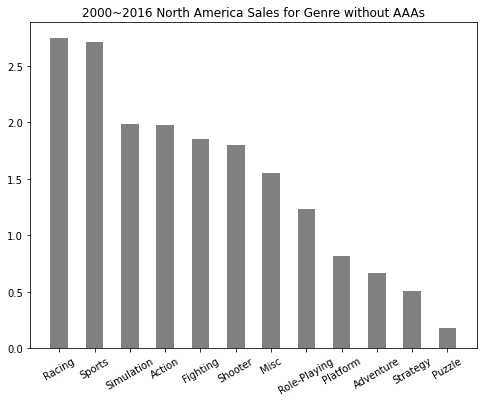

In [ ]:
#그래프 크기조절
plt.rcParams['figure.figsize'] = (8,6)

#북미
NA_Genre_TS_normal = NA_Genre_TS_normal.sort_values(by=['NA_Sales'],ascending=False)
ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels(NA_Genre_TS_normal['Genre'], rotation=30)
plt.bar(NA_Genre_TS_normal['Genre'],NA_Genre_TS_normal['NA_Sales'],color='gray',width=0.5)
plt.title('2000~2016 North America Sales for Genre without AAAs')

Text(0.5, 1.0, '2000~2016 EU Sales for Genre without AAAs')

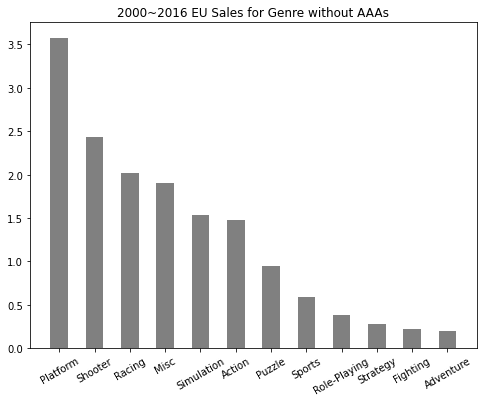

In [ ]:
#유럽
EU_Genre_TS_normal = EU_Genre_TS_normal.sort_values(by=['EU_Sales'],ascending=False)
ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels(EU_Genre_TS_normal['Genre'], rotation=30)
plt.bar(EU_Genre_TS_normal['Genre'],EU_Genre_TS_normal['EU_Sales'],color='gray',width=0.5)
plt.title('2000~2016 EU Sales for Genre without AAAs')

Text(0.5, 1.0, '2000~2016 Japan Sales for Genre without AAAs')

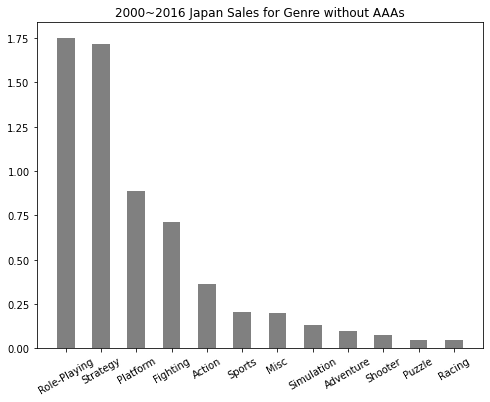

In [ ]:
#일본
JP_Genre_TS_normal = JP_Genre_TS_normal.sort_values(by=['JP_Sales'],ascending=False)
ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels(JP_Genre_TS_normal['Genre'], rotation=30)
plt.bar(JP_Genre_TS_normal['Genre'],JP_Genre_TS_normal['JP_Sales'],color='gray',width=0.5)
plt.title('2000~2016 Japan Sales for Genre without AAAs')

# 연도별 게임의 트렌드가 있는가?

연도별 트렌드란 장르에서의 트렌드와 플랫폼의 트렌드가 있을 것이다.

연도마다 많이 팔린 장르가 다를 것이고 많이 팔린 플랫폼은 다를 것이다.

게임의 소프트웨어적인 기획부분은 장르의 영향을 많이 받을 것이며 그것을 구현하는 데에는 플랫폼의 영향을 많이 받기도 할 것. 특히 PC 게임이 아닌 이상.

게임은 북미, 유럽, 일본이 선호하는 장르가 다르기 때문에 트렌드의 변화가 지역의 차이도 있을 것이다.

게임은 히트한 게임이 나오면 그 게임을 모방하는 게임이 많이 나오기 때문에 이때는 AAA급 게임을 포함한 데이터로 트렌드를 파악하는 것이 적절할 것이다.

## 연도별 장르의 트렌드 변화 살펴보기

### 연도별 전세계 장르 트렌드 변화

Text(0.5, 1.0, '2000~2016 Global Sales for Genre')

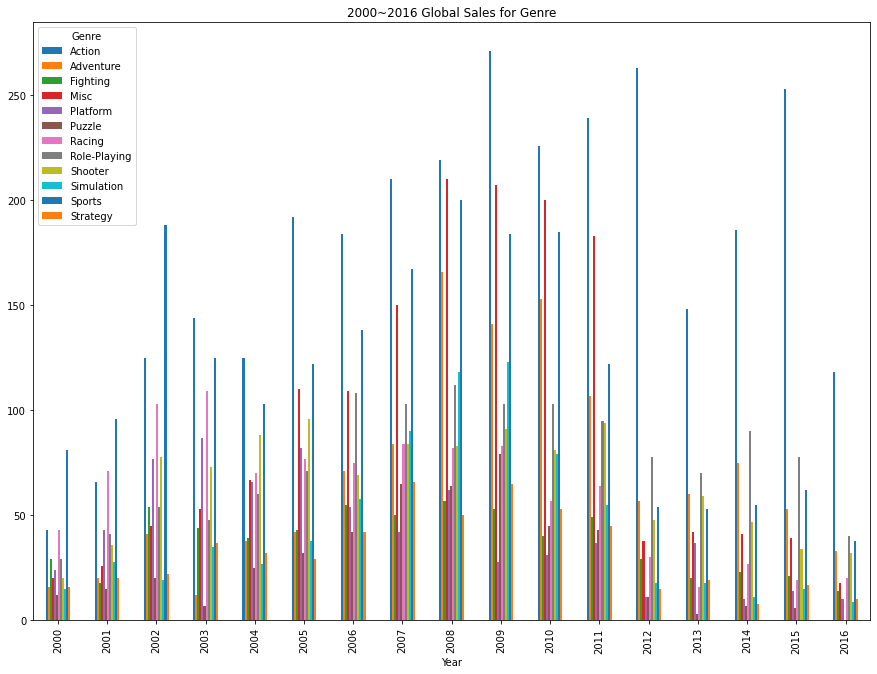

In [ ]:
plt.rcParams['figure.figsize'] = (15,11)

Year_Genre = new_df[['Genre','Year','Total_Sales(K)']]
pd.crosstab(Year_Genre['Year'],Year_Genre['Genre']).plot.bar()
plt.title('2000~2016 Global Sales for Genre')

Text(0.5, 1.0, '2000~2016 Global Sales for Genre')

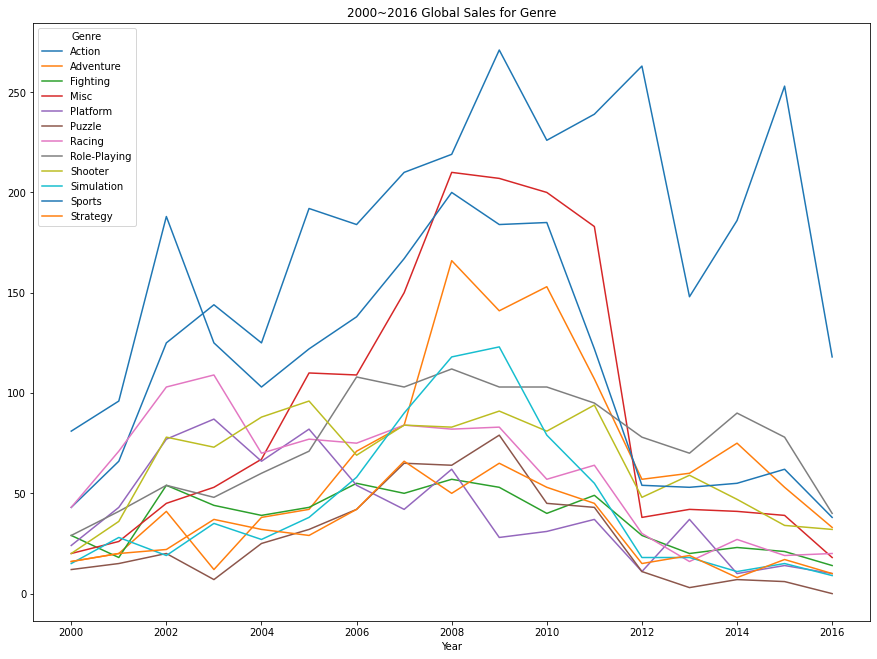

In [ ]:
pd.crosstab(Year_Genre['Year'],Year_Genre['Genre']).plot.line()
plt.title('2000~2016 Global Sales for Genre')

In [ ]:
Year_Genre = new_df[['Genre','Year','Total_Sales(K)']]
Year_Genre = Year_Genre.groupby(by=['Genre','Year'])
Year_Genre.count()

Total_Sales(K)
Genre    Year                
Action   2000              43
         2001              66
         2002             125
         2003             144
         2004             125
...                       ...
Strategy 2012              15
         2013              19
         2014               8
         2015              17
         2016              10

[203 rows x 1 columns]

Action 장르의 게임이 2000년부터 꾸준히 매출 1위를 달성하고 있다.
최근 2년간 전세계적으로 가장 많은 매출을 낸 게임 장르는 Action, Role-Playing, Sports이므로 전세계를 타겟으로한다면 위의 세 장르가 유력할 것이다.

## 연도별 북미시장 장르 트렌드 변화

### 연도별 북미 장르 트렌드 변화

Text(0.5, 1.0, '2000~2016 NA trend for Genre')

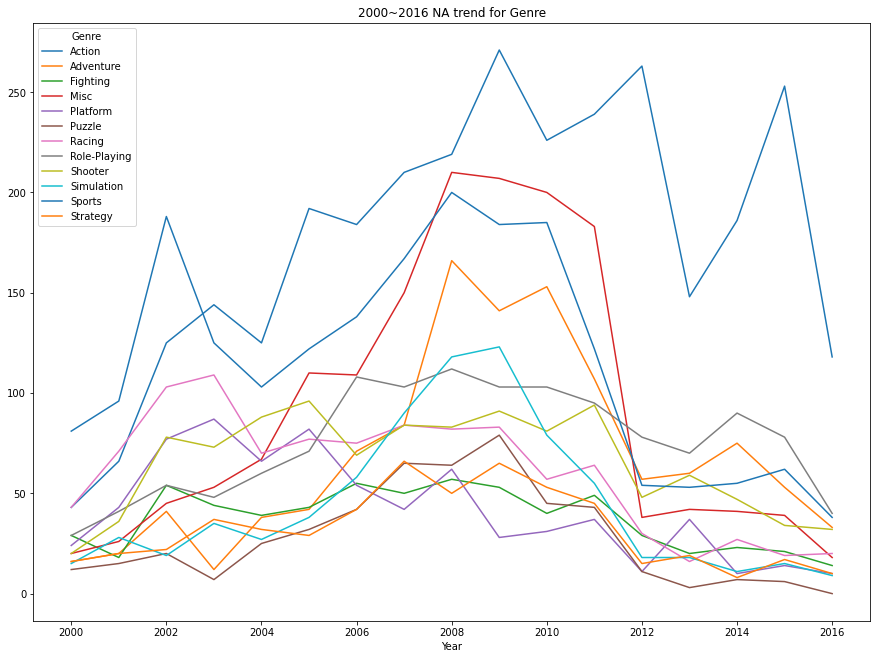

In [ ]:
Genre_NA = new_df[['Genre','Year','NA_Sales']]
pd.crosstab(Genre_NA['Year'],Genre_NA['Genre']).plot.line()
plt.title('2000~2016 NA trend for Genre')

In [ ]:
Genre_NA

,Genre,Year,NA_Sales
0,Action,2008,0.04
1,Action,2009,0.17
2,Adventure,2010,0.00
3,Misc,2010,0.04
4,Platform,2010,0.12
...,...,...,...
16592,Misc,2007,0.00
16593,Platform,2006,0.15
16594,Action,2005,0.01
16595,Sports,2015,0.44


# AAA급 게임은 지역에 따른 매출의 차이가 있을까?

눈으로봐도 너무 확연히 드러난다.

In [ ]:
Top_df[:26]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales(K)
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630.00,5.31,0.06,1.38,9636.75
12600,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7030.00,1.98,0.08,0.78,7032.84
1810,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3150.00,0.35,3157.34
9829,Super Mario Bros. 3,GBA,2003,Platform,Nintendo,2930.00,1.25,0.83,0.20,2932.28
7865,FIFA 14,X360,2013,Sports,Electronic Arts,0.92,2930.00,0.01,0.46,2931.39
3589,Final Fantasy IX,PS,2000,Role-Playing,SquareSoft,1.62,0.77,2780.00,0.14,2782.53
7499,Tony Hawk's Pro Skater 3,PS2,2001,Sports,Activision,2660.00,1.29,0.01,0.46,2661.76
1629,Assassin's Creed III,PS3,2012,Action,Ubisoft,2.64,2560.00,0.16,1.14,2563.94
10155,Crash Bandicoot: The Wrath of Cortex,PS2,2001,Platform,Universal Interactive,2.07,2290.00,0.24,0.82,2293.13
8010,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2130.00,0.06,0.69,2135.21


- H0: 북미의 장르별 평균 매출은 차이가 없다.
- H1: 북미의 장르별 평균 매출은 차이가 있다.

장르가 12개, 독립변수는 장르, 종속변수는 매출로 일원분산분석을 해야한다.

In [ ]:
AAA = Top_df[:26]
AAA_NA = AAA['NA_Sales']
AAA_EU = AAA['EU_Sales']
AAA_JP = AAA['JP_Sales']

import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

stats.f_oneway(AAA_EU,AAA_NA,AAA_JP)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


F_onewayResult(statistic=4.802061449700479, pvalue=0.010904734544814101)

이렇게보니 지역별로 차이가 크다. AAA급 게임을 만들 때 타겟 시장을 잡을 때는 북미, 유럽, 일본 중 한 지역만 잡아도 괜찮을 것 같다.

# 북미의 장르별 평균 매출은 차이가 있을까?

- H0: 북미의 장르별 평균 매출은 차이가 없다.
- H1: 북미의 장르별 평균 매출은 차이가 있다.

장르가 12개, 독립변수는 장르, 종속변수는 매출로 일원분산분석을 해야한다.

먼저 장르별 매출이 정규성, 등분산성, 독립성을 가지고 있는지 확인해주자.

AAA급 게임이라고 하더라도 장르에 따라 국가별로 선호하는 정도가 매우 다르기 때문에 AAA급까지 포함시켜주는 것이 좋을 것 같다.

또한 북미에서 팔리지 않은 게임은 의미가 없으니 NA_Sale이 0인 것들은 빼주려고 했으나 생각해보니 특정 지역에만 팔았는지, 혹은 팔았는데 안 팔렸는지 알 수 없다...결국 세 지역에 동시에 팔았다고 가정해야 한다. 데이터 자체에도 결함이 이것저것 있다.(제작사가 잘못 적혀있다던가...일본에만 판매된 것으로 알고 있는 것이 미국이나 유럽것까지있다거나. 

In [ ]:
NA_data = {'Name':new_df['Name'].copy(),'Platform':new_df['Platform'].copy(),'Year':new_df['Year'].copy(),'Genre':new_df['Genre'].copy() ,'NA_Sales':new_df['NA_Sales'].copy()}

NA_df = pd.DataFrame(data=NA_data)

#NA_Sales가 0인 게임들은 없애주기
##indexNames = NA_df[ NA_df['NA_Sales'] == 0 ].index
##NA_df.drop(indexNames , inplace=True)
NA_df

,Name,Platform,Year,Genre,NA_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,0.04
1,The Munchables,Wii,2009,Action,0.17
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12
...,...,...,...,...,...
16592,Minna no Chizu 2,PSP,2007,Misc,0.00
16593,Ice Age 2: The Meltdown,GC,2006,Platform,0.15
16594,Rainbow Islands: Revolution,PSP,2005,Action,0.01
16595,NBA 2K16,PS3,2015,Sports,0.44


In [ ]:
Action = NA_df[NA_df['Genre']=='Action']['NA_Sales']
Adventure = NA_df[NA_df['Genre']=='Adventure']['NA_Sales']
Fighting = NA_df[NA_df['Genre']=='Fighting']['NA_Sales']
Misc = NA_df[NA_df['Genre']=='Misc']['NA_Sales']
Platform = NA_df[NA_df['Genre']=='Platform']['NA_Sales']
Puzzle = NA_df[NA_df['Genre']=='Puzzle']['NA_Sales']
Racing = NA_df[NA_df['Genre']=='Racing']['NA_Sales']
Role_Playing= NA_df[NA_df['Genre']=='Role-Playing']['NA_Sales']
Shooter = NA_df[NA_df['Genre']=='Shooter']['NA_Sales']
Simulation = NA_df[NA_df['Genre']=='Simulation']['NA_Sales']
Sports = NA_df[NA_df['Genre']=='Sports']['NA_Sales']
Strategy = NA_df[NA_df['Genre']=='Strategy']['NA_Sales']

In [ ]:
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

stats.f_oneway(Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy)

F_onewayResult(statistic=0.7655005017435593, pvalue=0.6751978970208361)

pvaluerk 0.05보다 크기 때문에 귀무가설을 기각할 수 없다.
북미에서의 장르별 평균매출은 차이가 없다고 할 수 있다. 그렇다면 어떤 장르에서 더 성공할 가능성이 높을까? 북미, 유럽, 일본에서 액션이 공통적으로 많이 플레이가 되니, 세계 시장을 생각했을 때 액션을 출시하면 경쟁력을 갖춘다면 매출은 더 높이 나올 것이라 예상된다.

# 북미의 장르별 평균 매출은 AAA급 게임을 제외해도 차이가 있을까?
AAA급 게임이 없어도 장르별 평균 매출은 비슷할까?

- H0: 북미의 장르별 평균 매출은 차이가 없다.
- H1: 북미의 장르별 평균 매출은 차이가 있다.

장르가 12개, 독립변수는 장르, 종속변수는 매출로 일원분산분석을 해야한다.

먼저 장르별 매출이 정규성, 등분산성, 독립성을 가지고 있는지 확인해주자.

AAA급 게임을 제외해도 비슷할지 봐보자.

또한 북미에서 팔리지 않은 게임은 의미가 없으니 NA_Sale이 0인 것들은 빼주려했으나 팔리지 않은 것인지 출시를 안한 것인지 구분할 수 없으므로 내버려두자..

In [ ]:
NA_data = {'Name':normal_df['Name'],'Platform':normal_df['Platform'],'Year':normal_df['Year'],'Genre':normal_df['Genre'],'NA_Sales':normal_df['NA_Sales']}

NA_df_normal = pd.DataFrame(data=NA_data)

#NA_Sales가 0인 게임들은 없애주기
##indexNames = NA_df_normal[ NA_df_normal['NA_Sales'] == 0 ].index
##NA_df_normal.drop(indexNames , inplace=True)
NA_df_normal

,Name,Platform,Year,Genre,NA_Sales
14318,Viva Pinata,X360,2006,Simulation,0.45
14839,LEGO Star Wars II: The Original Trilogy,DS,2006,Action,960.00
2495,Bulletstorm,X360,2011,Shooter,610.00
8077,Inazuma Eleven 3,DS,2010,Role-Playing,0.00
5737,Mario Sports Mix,Wii,2010,Sports,900.00
...,...,...,...,...,...
12015,Colin McRae Rally 2005,PC,2004,Racing,0.00
15475,Shirahana no Ori: Hiiro no Kakera 4 - Shiki no...,PSP,2013,Adventure,0.00
12030,Collar x Malice,PSV,2016,Action,0.00
7930,World Snooker Championship 2007,X360,2007,Sports,0.00


In [ ]:
Action = NA_df_normal[NA_df_normal['Genre']=='Action']['NA_Sales']
Adventure = NA_df_normal[NA_df_normal['Genre']=='Adventure']['NA_Sales']
Fighting = NA_df_normal[NA_df_normal['Genre']=='Fighting']['NA_Sales']
Misc = NA_df_normal[NA_df_normal['Genre']=='Misc']['NA_Sales']
Platform = NA_df_normal[NA_df_normal['Genre']=='Platform']['NA_Sales']
Puzzle = NA_df_normal[NA_df_normal['Genre']=='Puzzle']['NA_Sales']
Racing = NA_df_normal[NA_df_normal['Genre']=='Racing']['NA_Sales']
Role_Playing=NA_df_normal[NA_df_normal['Genre']=='Role-Playing']['NA_Sales']
Shooter = NA_df_normal[NA_df_normal['Genre']=='Shooter']['NA_Sales']
Simulation = NA_df_normal[NA_df_normal['Genre']=='Simulation']['NA_Sales']
Sports = NA_df_normal[NA_df_normal['Genre']=='Sports']['NA_Sales']
Strategy = NA_df_normal[NA_df_normal['Genre']=='Strategy']['NA_Sales']

In [ ]:
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

stats.f_oneway(Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy)

F_onewayResult(statistic=1.1183869137178861, pvalue=0.3414608878981812)

AAA급 제임을 제외해도 큰 차이가 없다. 즉, 북미 시장에서 장르별 평균 매출은 큰 차이가 없다고 할 수 있다.

# 유럽의 장르별 평균 매출은 AAA급 게임을 제외해도 차이가 있을까?

In [ ]:
EU_data = {'Name':normal_df['Name'],'Platform':normal_df['Platform'],'Year':normal_df['Year'],'Genre':normal_df['Genre'],'EU_Sales':normal_df['EU_Sales']}
EU_df_normal = pd.DataFrame(data=EU_data)

Action = EU_df_normal[EU_df_normal['Genre']=='Action']['EU_Sales']
Adventure = EU_df_normal[EU_df_normal['Genre']=='Adventure']['EU_Sales']
Fighting = EU_df_normal[EU_df_normal['Genre']=='Fighting']['EU_Sales']
Misc = EU_df_normal[EU_df_normal['Genre']=='Misc']['EU_Sales']
Platform = EU_df_normal[EU_df_normal['Genre']=='Platform']['EU_Sales']
Puzzle = EU_df_normal[EU_df_normal['Genre']=='Puzzle']['EU_Sales']
Racing = EU_df_normal[EU_df_normal['Genre']=='Racing']['EU_Sales']
Role_Playing=EU_df_normal[EU_df_normal['Genre']=='Role-Playing']['EU_Sales']
Shooter = EU_df_normal[EU_df_normal['Genre']=='Shooter']['EU_Sales']
Simulation = EU_df_normal[EU_df_normal['Genre']=='Simulation']['EU_Sales']
Sports = EU_df_normal[EU_df_normal['Genre']=='Sports']['EU_Sales']
Strategy = EU_df_normal[EU_df_normal['Genre']=='Strategy']['EU_Sales']

import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

stats.f_oneway(Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy)


F_onewayResult(statistic=2.1073705560779845, pvalue=0.016726791800029117)

유럽의 경우, AAA급 제임을 제외하면 장르별 평균 매출에 유의미한 차이가 있다고 할 수 있다.

# 일본의 장르별 평균 매출은 AAA급 게임을 제외해도 차이가 있을까?

In [ ]:
JP_data = {'Name':normal_df['Name'],'Platform':normal_df['Platform'],'Year':normal_df['Year'],'Genre':normal_df['Genre'],'JP_Sales':normal_df['JP_Sales']}
JP_df_normal = pd.DataFrame(data=JP_data)

Action = JP_df_normal[JP_df_normal['Genre']=='Action']['JP_Sales']
Adventure = JP_df_normal[JP_df_normal['Genre']=='Adventure']['JP_Sales']
Fighting = JP_df_normal[JP_df_normal['Genre']=='Fighting']['JP_Sales']
Misc = JP_df_normal[JP_df_normal['Genre']=='Misc']['JP_Sales']
Platform = JP_df_normal[JP_df_normal['Genre']=='Platform']['JP_Sales']
Puzzle = JP_df_normal[JP_df_normal['Genre']=='Puzzle']['JP_Sales']
Racing = JP_df_normal[JP_df_normal['Genre']=='Racing']['JP_Sales']
Role_Playing=JP_df_normal[JP_df_normal['Genre']=='Role-Playing']['JP_Sales']
Shooter = JP_df_normal[JP_df_normal['Genre']=='Shooter']['JP_Sales']
Simulation = JP_df_normal[JP_df_normal['Genre']=='Simulation']['JP_Sales']
Sports = JP_df_normal[JP_df_normal['Genre']=='Sports']['JP_Sales']
Strategy = JP_df_normal[JP_df_normal['Genre']=='Strategy']['JP_Sales']

import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

stats.f_oneway(Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy)


F_onewayResult(statistic=2.5759171005082546, pvalue=0.00289539218872432)

일본도 AAA급 게임을 제외해도 장르별 평균 매출은 유의미한 차이가 있다.

# ❤️ 게임 개발의 목표

1M(1,000,000) 미만 판매한 게임들 중 최근 2년간 가장 많이 판매한 장르 혹은 상승세인 장르의 캐주얼 게임. 개발 기간이 1년이라고 했을 때 비교적 개발 기간이 짧은 캐주얼 게임을 선택하며 시장은 선택한 장르가 가장 많이 팔리는 지역을 선택한다. 캐주얼 게임은 매니아들만 아니라 게임에 열성적이지 않아도 플레이할 수 있는 게임. 플랫폼은 PC나 휴대용 콘솔이 주가 될 것으로 보인다.

# ⭐️ Racing 장르, 미국 시장 타겟, PC, PSP, ND3 위주.

# 플랫폼 종류

- 2600     (115) : PC
- 3DO        (3) : 콘솔, 1997년 단종
- 3DS      (498) : nintendo, 모바일, 2020년 단종
- DC        (52) : 콘솔, 2001년 단종
- DS      (2127) : nintendo, 모바일, 2013년 단종
- GB        (97) : nintendo, 모바일, 2003년 단종
- GBA      (784) : nintendo, 모바일, 2010년 단종
- GC       (541) : nintendo, 콘솔, 2003년 단종
- GEN       (27) : sega, 콘솔, 메가드라이브인가? 현재도 생산중.
- GG         (1) : sega, 콘솔, 2001년 단종
- N64      (313) : nintendo, 콘솔
- NES       (98) : nintendo, 콘솔
- NG        (12) : 네오지오, 콘솔, 2004년 단종
- PC       (935) : PC일까 엔진 이름이 PC인가? 
- PCFX       (1) : 콘솔, 망함, 단종
- PS      (1185) : sony playstation, 콘솔, 2006년 단종
- PS2     (2121) : sony playstation, 콘솔, 2013년 단종
- PS3     (1299) : sony playstation, 콘솔, 2017년 단종
- PS4      (335) : sony playstation, 콘솔
- PSP     (1193) : sony playstation, 모바일
- PSV      (409) : sony playstation, 모바일, 2019년 단종
- SAT      (173) : sega, 콘솔, 2000년 단종
- SCD        (6) : sony, 제작사 망함.
- SNES     (239) : nintendo, 콘솔 1997년 단종
- TG16       (2) : 터보그래픽스16같은데..너무 옛날 것.
- WS         (6) : 반다이, 모바일, 2003년 단종
- Wii     (1284) : nintendo, 콘솔, 2017년 단종
- WiiU     (143) : nintendo, 콘솔, 2017년 단종
- X360    (1231) : xbox, 콘솔, 2016년 단종
- XB       (799) : xbox, 콘솔, 2009년 단종
- XOne     (212) : xbox, 콘솔

In [ ]:
# 이 데이터에서 게임 플랫폼은 어떻게 될까?
raw_df.groupby('Platform').size()

Platform
2600     115
3DO        3
3DS      498
DC        52
DS      2127
GB        97
GBA      784
GC       541
GEN       27
GG         1
N64      313
NES       98
NG        12
PC       935
PCFX       1
PS      1185
PS2     2121
PS3     1299
PS4      335
PSP     1193
PSV      409
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1284
WiiU     143
X360    1231
XB       799
XOne     212
dtype: int64

## 2017년에 출시해도 괜찮은 플랫폼(최소 1.5년은 플레이할 수 있는 플랫폼)
- 2600     (115) : PC
- 3DS      (498) : nintendo, 모바일, 2020년 단종
- PC       (935) : PC일까 엔진 이름이 PC인가? 
- PS4      (335) : sony playstation, 콘솔
- PSP     (1193) : sony playstation, 모바일
- PSV      (409) : sony playstation, 모바일, 2019년 단종
- XOne     (212) : xbox, 콘솔


In [ ]:
new_df.groupby('Platform').size()

Platform
3DS      498
DC        31
DS      2125
GB        27
GBA      784
GC       541
N64       69
PC       895
PS       272
PS2     2121
PS3     1299
PS4      334
PSP     1193
PSV      407
WS         4
Wii     1284
WiiU     143
X360    1231
XB       799
XOne     212
dtype: int64

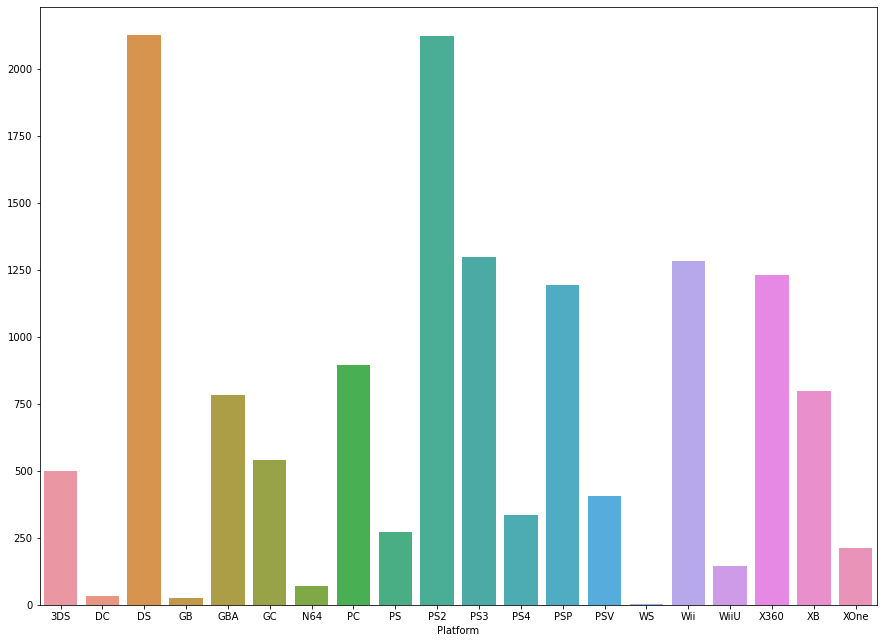

In [ ]:
plaSize = new_df.groupby('Platform').size()
sns.barplot(x = plaSize.index, y = plaSize.values)

# Racing 장르에 대해서 더 분석해보자.

In [ ]:
Racing_df = new_df[new_df['Genre'].str.contains('Racing')]
Racing_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales(K)
10,Ford Racing,PS,2001,Racing,Empire Interactive,480.00,330.00,0.00,0.06,810.06
29,McGrath Vs. Pastrana Freestyle Motocross,PS,2000,Racing,Acclaim Entertainment,0.14,0.10,0.00,0.02,0.26
49,Dreamworks Madagascar Kartz,X360,2009,Racing,Activision,0.14,0.09,0.00,0.02,0.25
56,Sébastien Loeb Rally Evo,PS4,2016,Racing,Milestone S.r.l,0.00,0.04,0.00,0.01,0.05
79,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...
16486,American Chopper 2: Full Throttle,PS2,2005,Racing,Zoo Digital Publishing,0.09,0.07,0.00,0.02,0.18
16494,Split/Second,PS3,2010,Racing,Disney Interactive Studios,0.31,0.31,0.01,0.12,0.75
16518,R: Racing Evolution,GC,2003,Racing,Namco Bandai Games,0.06,0.02,0.00,0.00,0.08
16539,Juiced 2: Hot Import Nights,DS,2007,Racing,THQ,0.22,0.00,0.00,0.02,0.24


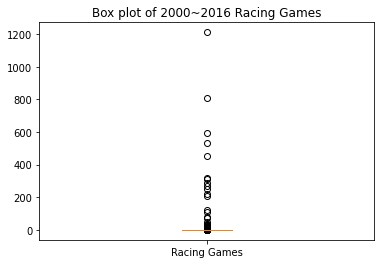

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline

plt.boxplot(Racing_df['Total_Sales(K)'])
plt.title('Box plot of 2000~2016 Racing Games')
plt.xticks([1], ['Racing Games'])

plt.show()

In [ ]:
Racing_df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales(K)
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,2006.344660,3.919476,2.020534,0.046311,0.465670,6.451990
std,4.063233,48.192902,25.754023,0.659486,9.767556,58.102796
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.030000,0.010000,0.000000,0.000000,0.062500
50%,2006.000000,0.095000,0.040000,0.000000,0.010000,0.180000
75%,2009.000000,0.250000,0.160000,0.000000,0.050000,0.517500
max,2016.000000,1210.000000,590.000000,20.000000,310.000000,1210.960000


In [ ]:
Year_Racing = Racing_df[['Year','Genre','Total_Sales(K)']]

Year_Racing.groupby(['Year'])

Year_Racing_TS = Year_Racing.groupby(['Year'])['Total_Sales(K)'].sum().reset_index()
Year_Racing_TS

,Year,Total_Sales(K)
0,2000,349.67
1,2001,1174.71
2,2002,299.88
3,2003,691.54
4,2004,395.26
5,2005,605.85
6,2006,64.03
7,2007,138.85
8,2008,410.39
9,2009,153.97


<BarContainer object of 17 artists>

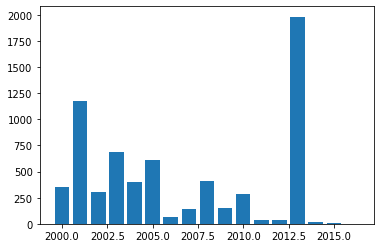

In [ ]:
plt.bar(Year_Racing_TS['Year'],Year_Racing_TS['Total_Sales(K)'])

<BarContainer object of 17 artists>

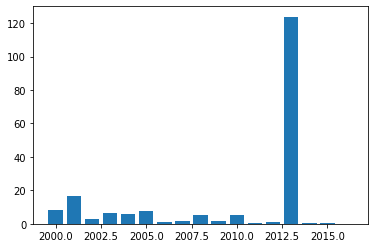

In [ ]:
Year_Racing_mean = Year_Racing.groupby(['Year'])['Total_Sales(K)'].mean().reset_index()
plt.bar(Year_Racing_mean['Year'],Year_Racing_mean['Total_Sales(K)'])

In [ ]:
Year_Racing_mean

,Year,Total_Sales(K)
0,2000,8.131860
1,2001,16.545211
2,2002,2.911456
3,2003,6.344404
4,2004,5.646571
5,2005,7.868182
6,2006,0.853733
7,2007,1.652976
8,2008,5.004756
9,2009,1.855060


## Racing 장르의 게임 AAA급 게임 빼고 다시 분석하면?

In [ ]:
Racing_df_normal = Racing_df.sort_values(by=['Total_Sales(K)'],ascending=False)[0:]
Racing_df_normal

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales(K)
5296,Forza Motorsport 5,XOne,2013,Racing,Microsoft Game Studios,1210.00,0.78,0.01,0.17,1210.96
10,Ford Racing,PS,2001,Racing,Empire Interactive,480.00,330.00,0.00,0.06,810.06
11318,PGR: Project Gotham Racing 2,XB,2003,Racing,Microsoft Game Studios,0.97,590.00,0.04,0.07,591.08
16408,NASCAR 06: Total Team Control,PS2,2005,Racing,Electronic Arts,530.00,0.02,0.00,0.09,530.11
6203,Need for Speed Rivals,XOne,2013,Racing,Electronic Arts,450.00,0.17,0.00,0.05,450.22
...,...,...,...,...,...,...,...,...,...,...
15286,V-Rally 3,XB,2003,Racing,Atari,0.01,0.00,0.00,0.00,0.01
681,Speed Kings,GC,2003,Racing,Acclaim Entertainment,0.01,0.00,0.00,0.00,0.01
15986,Juiced 2: Hot Import Nights,PC,2007,Racing,THQ,0.00,0.01,0.00,0.00,0.01
9457,Hot Wheels: Stunt Track Challenge / World Race,GBA,2006,Racing,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01


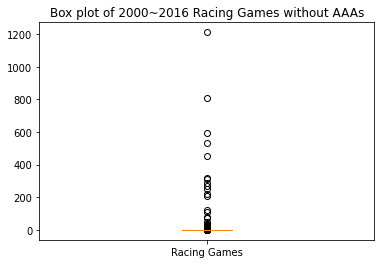

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline

plt.boxplot(Racing_df_normal['Total_Sales(K)'])
plt.title('Box plot of 2000~2016 Racing Games without AAAs')
plt.xticks([1], ['Racing Games'])

plt.show()

In [ ]:
Racing_df_normal.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales(K)
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,2006.344660,3.919476,2.020534,0.046311,0.465670,6.451990
std,4.063233,48.192902,25.754023,0.659486,9.767556,58.102796
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.030000,0.010000,0.000000,0.000000,0.062500
50%,2006.000000,0.095000,0.040000,0.000000,0.010000,0.180000
75%,2009.000000,0.250000,0.160000,0.000000,0.050000,0.517500
max,2016.000000,1210.000000,590.000000,20.000000,310.000000,1210.960000


등분산이나 정규분포를 어떻게 확인하지... 표줕편차를 보니까 평균에서 많이 떨어진 것으로 보인다.

# 액션게임은 어떤가?

In [ ]:
Action_df = new_df[new_df['Genre'].str.contains('Action')]
Action_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales(K)
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08
15,Mini Ninjas,PS3,2009,Action,Eidos Interactive,0.14,0.16,0.00,0.06,0.36
...,...,...,...,...,...,...,...,...,...,...
16575,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08
16581,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27
16583,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,0.91,0.39,0.00,0.13,1.43
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01


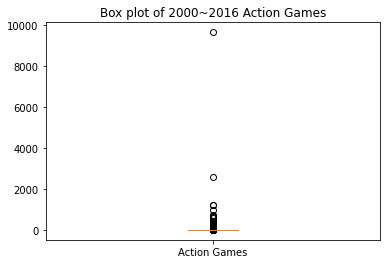

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline

plt.boxplot(Action_df['Total_Sales(K)'])
plt.title('Box plot of 2000~2016 Action Games')
plt.xticks([1], ['Action Games'])

plt.show()

In [ ]:
Action_df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales(K)
count,3012.000000,3012.000000,3012.000000,3012.000000,3012.000000,3012.000000
mean,2009.040173,5.982942,2.331577,0.364446,0.503161,9.182125
std,4.210508,180.508984,51.659915,7.062145,9.024788,188.141253
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2006.000000,0.010000,0.000000,0.000000,0.000000,0.070000
50%,2009.000000,0.100000,0.030000,0.000000,0.010000,0.190000
75%,2012.000000,0.250000,0.150000,0.030000,0.050000,0.520000
max,2016.000000,9630.000000,2560.000000,330.000000,340.000000,9636.750000


In [ ]:
Year_Action = Action_df[['Year','Genre','Total_Sales(K)']]

Year_Action.groupby(['Year'])

Year_Action_TS = Year_Action.groupby(['Year'])['Total_Sales(K)'].sum().reset_index()
Year_Action_TS

,Year,Total_Sales(K)
0,2000,33.89
1,2001,865.87
2,2002,1715.02
3,2003,497.55
4,2004,445.78
5,2005,185.42
6,2006,1505.05
7,2007,655.44
8,2008,3102.49
9,2009,1506.95


<BarContainer object of 17 artists>

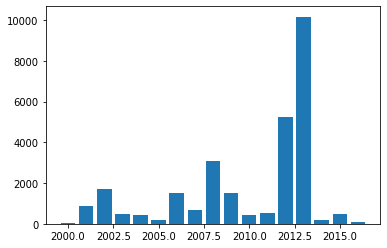

In [ ]:
plt.bar(Year_Action_TS['Year'],Year_Action_TS['Total_Sales(K)'])

<BarContainer object of 17 artists>

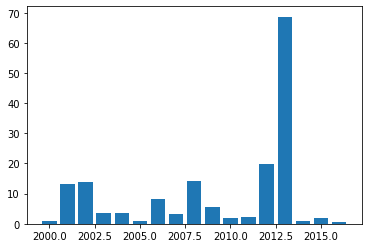

In [ ]:
Year_Action_mean = Year_Action.groupby(['Year'])['Total_Sales(K)'].mean().reset_index()
plt.bar(Year_Action_mean['Year'],Year_Action_mean['Total_Sales(K)'])

In [ ]:
Year_Action_mean

,Year,Total_Sales(K)
0,2000,0.788140
1,2001,13.119242
2,2002,13.720160
3,2003,3.455208
4,2004,3.566240
5,2005,0.965729
6,2006,8.179620
7,2007,3.121143
8,2008,14.166621
9,2009,5.560701


## Action 장르의 게임 AAA급 빼고 다시 분석하면?

In [ ]:
Action_df_normal = Action_df.sort_values(by=['Total_Sales(K)'],ascending=False)[4:]
Action_df_normal

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales(K)
14839,LEGO Star Wars II: The Original Trilogy,DS,2006,Action,LucasArts,960.00,0.04,0.00,0.08,960.12
14242,WWE '13,X360,2012,Action,THQ,720.00,0.45,0.00,0.11,720.56
4231,Harry Potter and the Sorcerer's Stone,GBA,2001,Action,Electronic Arts,0.87,660.00,0.08,0.08,661.03
3411,LEGO Indiana Jones: The Original Adventures,DS,2008,Action,Activision,1.42,610.00,0.00,0.21,611.63
447,Medal of Honor: Warfighter,X360,2012,Action,Electronic Arts,580.00,0.47,0.01,0.10,580.58
...,...,...,...,...,...,...,...,...,...,...
6877,Monkey Madness: Island Escape,DS,2010,Action,Storm City Games,0.01,0.00,0.00,0.00,0.01
12741,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007,Action,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01
15549,LEGO Star Wars II: The Original Trilogy,PC,2006,Action,Activision,0.00,0.01,0.00,0.00,0.01
4611,Barbie and Her Sisters Puppy Rescue,PS3,2015,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01


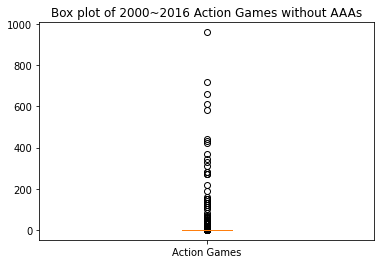

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline

plt.boxplot(Action_df_normal['Total_Sales(K)'])
plt.title('Box plot of 2000~2016 Action Games without AAAs')
plt.xticks([1], ['Action Games'])

plt.show()

In [ ]:
Action_df_normal.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales(K)
count,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000
mean,2009.040559,1.977387,1.481536,0.364840,0.502916,4.326679
std,4.210343,28.782213,22.273056,7.066832,9.030761,38.068111
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2006.000000,0.010000,0.000000,0.000000,0.000000,0.070000
50%,2009.000000,0.100000,0.030000,0.000000,0.010000,0.190000
75%,2012.000000,0.250000,0.150000,0.030000,0.050000,0.520000
max,2016.000000,960.000000,660.000000,330.000000,340.000000,960.120000


In [ ]:
Racing_df_normal.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales(K)
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,2006.344660,3.919476,2.020534,0.046311,0.465670,6.451990
std,4.063233,48.192902,25.754023,0.659486,9.767556,58.102796
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.030000,0.010000,0.000000,0.000000,0.062500
50%,2006.000000,0.095000,0.040000,0.000000,0.010000,0.180000
75%,2009.000000,0.250000,0.160000,0.000000,0.050000,0.517500
max,2016.000000,1210.000000,590.000000,20.000000,310.000000,1210.960000


# Racing 게임의 매출은 국가별로 차이가 있는가?

In [ ]:
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

stats.f_oneway(Racing_df['NA_Sales'],Racing_df['EU_Sales'],Racing_df['JP_Sales'])

F_onewayResult(statistic=3.8811238834754542, pvalue=0.020728359059746976)

국가별로 장르의 차이가 있었으니 어찌보면 당연하겠지만 Racing 장르에 있어서 각 국가의 출고량은 95%의 유의확률로 차이가 있다고 할 수 있다.

비록 전체적인 흐름은 액션 쪽이 더 유망해보이나 제작기간이 1년 미만인 게임으로서는 전 지역에서 큰 차이없이 예상범위 내의 수익을 얻는 것이 바람직할 것이다. 여기에서 다음 게임을 위한 자본금을 모으면서 명성을 쌓으면서 대작 게임을 만들어나가면 바람직할 것이다.

# Racing 게임 Platform 선정

In [ ]:
Racing_NA = Racing_df[['Platform','NA_Sales']]
Racing_EU = Racing_df[['Platform','EU_Sales']]
Racing_JP = Racing_df[['Platform','JP_Sales']]

Racing_NA

,Platform,NA_Sales
10,PS,480.00
29,PS,0.14
49,X360,0.14
56,PS4,0.00
79,Wii,0.00
...,...,...
16486,PS2,0.09
16494,PS3,0.31
16518,GC,0.06
16539,DS,0.22


In [ ]:
new_platforms = ['3DS','PC','PS4','PSP','PSV','XOne']

Racing_NA = Racing_NA[Racing_NA['Platform'].str.contains('|'.join(new_platforms))]
Racing_EU = Racing_EU[Racing_EU['Platform'].str.contains('|'.join(new_platforms))]
Racing_JP = Racing_JP[Racing_JP['Platform'].str.contains('|'.join(new_platforms))]

In [ ]:
Racing_NA.groupby('Platform').count()


,NA_Sales
Platform,
3DS,10
PC,55
PS4,17
PSP,65
PSV,11
XOne,19


Racing 장르의 게임은 3DS로는 10개, PC로는 55개, PS4로는 17개, PSP로는 65개, PSV는 11개, XOne으로는 19개가 있었다.

## 각 플랫폼, 각 지역별로 나누어주기

- 3DS:
- PC: 매우 낮음
- PS4:
- PSP:
- PSV:
- XOne:

In [ ]:
NA_3DS = Racing_NA.groupby('Platform').get_group('3DS').reset_index(drop=True)
NA_PC = Racing_NA.groupby('Platform').get_group('PC').reset_index(drop=True)
NA_PS4 = Racing_NA.groupby('Platform').get_group('PS4').reset_index(drop=True)
NA_PSP = Racing_NA.groupby('Platform').get_group('PSP').reset_index(drop=True)
NA_PSV = Racing_NA.groupby('Platform').get_group('PSV').reset_index(drop=True)
NA_XOne = Racing_NA.groupby('Platform').get_group('XOne').reset_index(drop=True)

In [ ]:
EU_3DS = Racing_EU.groupby('Platform').get_group('3DS')['EU_Sales'].reset_index(drop=True)
EU_PC = Racing_EU.groupby('Platform').get_group('PC')['EU_Sales'].reset_index(drop=True)
EU_PS4 = Racing_EU.groupby('Platform').get_group('PS4')['EU_Sales'].reset_index(drop=True)
EU_PSP = Racing_EU.groupby('Platform').get_group('PSP')['EU_Sales'].reset_index(drop=True)
EU_PSV = Racing_EU.groupby('Platform').get_group('PSV')['EU_Sales'].reset_index(drop=True)
EU_XOne = Racing_EU.groupby('Platform').get_group('XOne')['EU_Sales'].reset_index(drop=True)

In [ ]:
JP_3DS = Racing_JP.groupby('Platform').get_group('3DS')['JP_Sales'].reset_index(drop=True)
JP_PC = Racing_JP.groupby('Platform').get_group('PC')['JP_Sales'].reset_index(drop=True)
JP_PS4 = Racing_JP.groupby('Platform').get_group('PS4')['JP_Sales'].reset_index(drop=True)
JP_PSP = Racing_JP.groupby('Platform').get_group('PSP')['JP_Sales'].reset_index(drop=True)
JP_PSV = Racing_JP.groupby('Platform').get_group('PSV')['JP_Sales'].reset_index(drop=True)
JP_XOne = Racing_JP.groupby('Platform').get_group('XOne')['JP_Sales'].reset_index(drop=True)

## 3DS

In [ ]:
concat_3DS = pd.concat([NA_3DS,EU_3DS,JP_3DS],axis=1)
concat_3DS

,Platform,NA_Sales,EU_Sales,JP_Sales
0,3DS,0.18,0.00,0.00
1,3DS,0.21,0.00,0.00
2,3DS,0.27,0.16,0.02
3,3DS,0.19,0.15,0.12
4,3DS,0.07,0.06,0.00
5,3DS,0.05,0.04,0.00
6,3DS,0.07,0.08,0.00
7,3DS,4.74,3.91,2.67
8,3DS,0.08,0.03,0.00
9,3DS,0.12,0.15,0.00


## PC

In [ ]:
concat_PC = pd.concat([NA_PC,EU_PC,JP_PC],axis=1)
concat_PC

,Platform,NA_Sales,EU_Sales,JP_Sales
0,PC,0.00,0.04,0.0
1,PC,0.00,0.02,0.0
2,PC,0.00,0.03,0.0
3,PC,0.00,0.01,0.0
4,PC,0.00,0.03,0.0
5,PC,20.00,0.23,0.0
6,PC,0.00,0.03,0.0
7,PC,0.00,0.04,0.0
8,PC,0.00,0.02,0.0
9,PC,0.00,0.01,0.0


## PS4

In [ ]:
concat_PS4 = pd.concat([NA_PS4,EU_PS4,JP_PS4],axis=1)
concat_PS4

,Platform,NA_Sales,EU_Sales,JP_Sales
0,PS4,0.00,0.04,0.00
1,PS4,0.04,0.11,0.00
2,PS4,0.01,0.05,0.00
3,PS4,0.03,0.13,0.03
4,PS4,0.00,0.12,0.03
5,PS4,0.09,0.44,0.03
6,PS4,0.34,1.08,0.03
7,PS4,0.01,0.21,0.01
8,PS4,0.02,0.05,0.00
9,PS4,0.03,0.24,0.00


## PSP

In [ ]:
concat_PSP = pd.concat([NA_PSP,EU_PSP,JP_PSP],axis=1)
concat_PSP

,Platform,NA_Sales,EU_Sales,JP_Sales
0,PSP,0.00,0.01,0.0
1,PSP,0.05,0.08,0.0
2,PSP,0.09,0.00,0.0
3,PSP,0.00,0.00,0.1
4,PSP,0.16,0.58,0.0
...,...,...,...,...
60,PSP,0.29,0.07,0.0
61,PSP,0.03,0.00,0.0
62,PSP,0.07,0.00,0.0
63,PSP,0.03,0.00,0.0


## PSV

In [ ]:
concat_PSV = pd.concat([NA_PSV,EU_PSV,JP_PSV],axis=1)
concat_PSV

,Platform,NA_Sales,EU_Sales,JP_Sales
0,PSV,0.00,0.00,0.05
1,PSV,0.00,0.05,0.00
2,PSV,0.04,0.08,0.05
3,PSV,0.00,0.00,0.04
4,PSV,0.12,0.25,0.00
5,PSV,0.02,0.02,0.00
6,PSV,0.17,0.12,0.00
7,PSV,0.38,0.52,0.01
8,PSV,0.00,0.01,0.00
9,PSV,0.03,0.08,0.01


## XOne

In [ ]:
concat_XOne = pd.concat([NA_XOne,EU_XOne,JP_XOne],axis=1)
concat_XOne

,Platform,NA_Sales,EU_Sales,JP_Sales
0,XOne,0.24,0.34,0.00
1,XOne,0.00,0.01,0.00
2,XOne,0.00,0.03,0.00
3,XOne,0.30,0.33,0.00
4,XOne,0.08,0.15,0.00
5,XOne,0.03,0.08,0.00
6,XOne,0.50,0.78,0.01
7,XOne,1210.00,0.78,0.01
8,XOne,0.02,0.00,0.00
9,XOne,0.69,0.89,0.03


In [ ]:
concat_Racing = pd.concat([concat_3DS,concat_PC,concat_PS4,concat_PSP,concat_PSV,concat_XOne])
concat_Racing

,Platform,NA_Sales,EU_Sales,JP_Sales
0,3DS,0.18,0.00,0.00
1,3DS,0.21,0.00,0.00
2,3DS,0.27,0.16,0.02
3,3DS,0.19,0.15,0.12
4,3DS,0.07,0.06,0.00
...,...,...,...,...
14,XOne,0.04,0.05,0.00
15,XOne,0.12,0.10,0.00
16,XOne,0.00,0.02,0.00
17,XOne,0.00,0.01,0.00


### PCA 해보기

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = concat_Racing[['NA_Sales','EU_Sales','JP_Sales']]
Z = scaler.fit_transform(features)

pca_2 = PCA(3) #3차원 데이터를 사용해서 확인해보기
pca_fit_2 = pca_2.fit_transform(Z) ##이 함수에 대해 더 알아보기


standardized_data = (features - np.mean(features, axis=0))/np.std(features, ddof = 1, axis=0)
covariance_matrix = np.cov(standardized_data.T)

values, vectors = np.linalg.eig(covariance_matrix)
sing_vals = np.arange(len(values))+1

plt.plot(sing_vals, values, 'ro-')

plt.title('Scree Plot')
plt.xlabel('Numbers of Components,values')
plt.ylabel('Eigen Value')

NameError: ignored

In [ ]:
per_var = pca_2.explained_variance_ratio_*100 #총합이 99.99999로 100이라고 할 수 있다.
labels = ['1','2','3']

plt.plot(labels, per_var, 'ro-',)
plt.title('Scree Plot')
plt.xlabel('Numbers of Components,values')
plt.ylabel('explained variance ratio(%)')

print(per_var)

결국, 이 데이터를 위해서는 세 개의 축을 모두 써야 90% 이상을 설명할 수 있다. 70% 미만을 설명하려면 해도 되지만 굳이 그럴 필요는 없다.

# Racing 게임의 매출은 플랫폼별로 차이가 있는가?

## 북미는 플랫폼별 Racing 게임 매출 차이가 있다고 할 수 있다.

In [ ]:
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

stats.f_oneway(NA_3DS['NA_Sales'],NA_PC['NA_Sales'],NA_PS4['NA_Sales'],NA_PSP['NA_Sales'],NA_PSV['NA_Sales'],NA_XOne['NA_Sales'])

F_onewayResult(statistic=2.899096767216794, pvalue=0.015391347090015647)

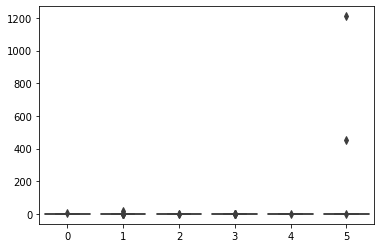

In [ ]:
NA_Platform = [NA_3DS['NA_Sales'],NA_PC['NA_Sales'],NA_PS4['NA_Sales'],NA_PSP['NA_Sales'],NA_PSV['NA_Sales'],NA_XOne['NA_Sales']]
sns.boxplot(data=NA_Platform)

In [ ]:
for i in NA_Platform:
  print(i.mean())

0.5980000000000001
0.37036363636363645
0.1452941176470588
0.2301538461538461
0.08181818181818182
87.48842105263158


In [ ]:
NA_XOne['NA_Sales'].sort_values(ascending=False)[2:].mean()

0.1341176470588235

이상치가 없을 때 각 플랫폼별 미국의 평균 매출량

- 0.5980000000000001
- 0.37036363636363645
- 0.1452941176470588
- 0.2301538461538461
- 0.08181818181818182
- 0.1341176470588235

## 유럽은 플랫폼별 Racing 게임 매출 차이가 있다고 할 수 있다.

In [ ]:
stats.f_oneway(EU_3DS,EU_PC,EU_PS4,EU_PSP,EU_PSV,EU_XOne)

F_onewayResult(statistic=0.3389973437220529, pvalue=0.8887265881989492)

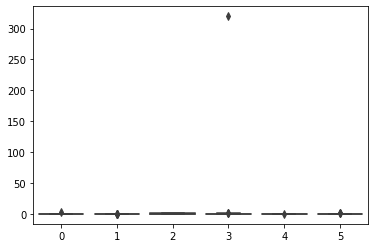

In [ ]:
EU_Platform = [EU_3DS,EU_PC,EU_PS4,EU_PSP,EU_PSV,EU_XOne]
sns.boxplot(data=EU_Platform)

In [ ]:
for i in EU_Platform:
  print(i.mean())

0.4580000000000001
0.05163636363636362
0.4188235294117647
5.099230769230769
0.12000000000000001
0.21894736842105259


In [ ]:
EU_PSP.sort_values(ascending=False)[1:].mean()

0.1789062499999999

- 0.4580000000000001
- 0.05163636363636362
- 0.4188235294117647
- 0.1789062499999999
- 0.12000000000000001
- 0.21894736842105259

## 일본은 플랫폼별 Racing 게임 매출 차이가 있다고 할 수 있다.

In [ ]:
stats.f_oneway(JP_3DS,JP_PC,JP_PS4,JP_PSP,JP_PSV,JP_XOne)

F_onewayResult(statistic=3.6903107339806684, pvalue=0.0033836898406361124)

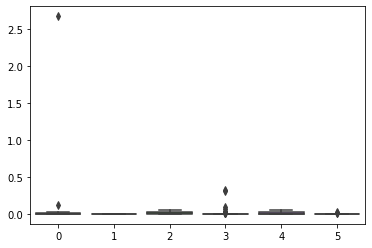

In [ ]:
JP_Platform = [JP_3DS,JP_PC,JP_PS4,JP_PSP,JP_PSV,JP_XOne]
sns.boxplot(data=JP_Platform)

In [ ]:
for i in JP_Platform:
  print(i.mean())

0.281
0.0
0.015294117647058824
0.014923076923076926
0.014545454545454549
0.002631578947368421


In [ ]:
JP_3DS.sort_values(ascending=False)[1:].mean()

0.015555555555555553

In [ ]:
import numpy as np
ALL_Platform = np.array([[0.5980000000000001,0.4580000000000001,0.281],[0.37036363636363645,0.05163636363636362,0.0],
                            [0.1452941176470588,0.4188235294117647,0.015294117647058824],[0.230153846153846,5.099230769230769,0.014923076923076926],
                            [0.08181818181818182,0.12000000000000001,0.014545454545454549],[87.48842105263158,0.21894736842105259,0.002631578947368421]])
pie = np.array([[0.255],[0.204],[0.124]])

ALL_Platform @pie

array([[ 0.280766  ],
       [ 0.10497655],
       [ 0.12438647],
       [ 1.10078277],
       [ 0.04714727],
       [22.35453895]])

XOne, PSP, 3DS를 위주로 개발하는 것이 세 시장에서 가장 유의미할 것으로 보인다.

In [ ]:
Normal_Platform = np.array([[0.5980000000000001,0.4580000000000001,0.015555555555555553],[0.37036363636363645,0.05163636363636362,0.0],
                            [0.1452941176470588,0.4188235294117647,0.015294117647058824],[0.230153846153846,0.1789062499999999,0.014923076923076926],
                            [0.08181818181818182,0.12000000000000001,0.014545454545454549],[0.1341176470588235,0.21894736842105259,0.002631578947368421]])
pie = np.array([[0.255],[0.204],[0.124]])

Normal_Platform @pie

array([[0.24785089],
       [0.10497655],
       [0.12438647],
       [0.09703657],
       [0.04714727],
       [0.07919158]])

3DS, PS4, PC 를 위주로 개발하는 것이 세 시장에서 가장 유의미할 것으로 보인다.